## Creation of tiny SNN
Task 1. Input data to spiketrain conversion <- 7/22- \
Task 2. LIF neuron creation \
Task 3. Network creation \
Task 4. Training, label assignment, and classification

名称未設定ファイル.drawio.svg

## 1. Input data to spiketrain conversion
Complete the program by filling out "..." parts

### 1.1 Define training and testing data
data: $(x_1, x_2)$ \
if $x_1 > x_2$, it is pattern 1 \
if $x_2 > x_1$, it is pattern 2 \
$x_1, x_2\in[0, 1]$

In [15]:
import torch
from random import random

train_set = [
    torch.tensor([1, 0]), # clear pattern 1
    torch.tensor([0, 1])  # clear pattern 2
]

test_set = [
    torch.tensor([random(), random()]) for t in range(10) # random pattern
]

### 1.2 Define maximum firing ratio, number of timesteps
Before passing data to network, we need to convert values in the data into spiketrains. Number of spikes in a spiketrain is firing ratio.

名称未設定ファイル.drawio(1).svg

In [16]:
max_firing_ratio = 200 # (Hz)
n_timesteps = 1000 # (1000 time steps per second)

### Based on spike probability at each timestep, randomly sample a spike
$P_{spike}=\frac{\text{firing ratio}}{n_{timesteps}}$ \
Random number: $r\in[0, 1]$ \
if $r\ \le P_{spike}$ -> genrate a spike (1) \\
else no spike (0)


In [17]:
def spike(firing_ratio):
  """
  args:
    firing_ratio (int): How many spikes in timesteps (Hz)
  returns:
    0 (no spike) or 1 (spike)
  """
  P_spike = firing_ratio/n_timesteps
  r = random()
  if r <= P_spike:
    return 1
  else:
    return 0

### Convert pattern into firing ratio
Firing ratio: value in pattern $\times$ max_firing_ratio

In [18]:
train_set = [pattern * max_firing_ratio for pattern in train_set]
test_set = [pattern * max_firing_ratio for pattern in test_set]

### Generate spiketrain from patterns

In [19]:
def generate_spiketrain(pattern):
  """
  args:
    pattern (torch.tensor): 1D torch.tensor containing firing rates of the pattern (i.e (200, 0))
  returns:
    spiketrain (torch.tensor): 2D torch.tensor containing two spiketrains
  """
  spiketrain = torch.empty(2, n_timesteps)
  for i, val in enumerate(pattern):
    for t in range(n_timesteps):
      spiketrain[i][t] = spike(val)
  return spiketrain

In [20]:
spiketrains_train = [generate_spiketrain(pattern) for pattern in train_set]
spiketrains_test = [generate_spiketrain(pattern) for pattern in test_set]

### Veiw generated spiketrains

In [21]:
import matplotlib.pyplot as plt

def plot_spiketrain(spiketrain):
  fig, ax = plt.subplots(2, 1, sharex=True)
  ax[0].plot(spiketrain[0])
  ax[1].plot(spiketrain[1])

  ax[0].set_yticks([0, 1])
  ax[1].set_yticks([0, 1])
  fig.show()

C:\Users\kotaro\AppData\Local\Temp\ipykernel_18720\4002724005.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


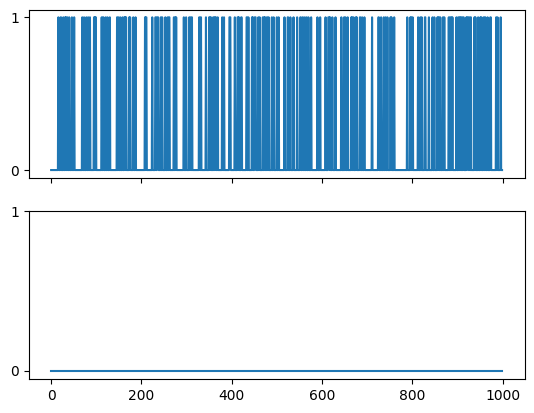

In [22]:
plot_spiketrain(spiketrains_train[0]) # spiketrain for pattern 1: (1, 0)